In [170]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Challenge

In [2]:
challenge = pd.read_csv('./DSG2018-qualifiers/Challenge_20180423.csv')
challenge

,PredictionIdx,DateKey,CustomerIdx,IsinIdx,BuySell,CustomerInterest
0,a1e0d80784,20180423,1856,13323,Buy,NaN
1,c2cc6cc2a8,20180423,1856,9230,Buy,NaN
2,a8e94f6344,20180423,1780,9157,Buy,NaN
3,758bae1e35,20180423,2129,9131,Buy,NaN
4,02ab378ee8,20180423,1758,7151,Buy,NaN
5,1da271574e,20180423,1746,13099,Buy,NaN
6,19d88220a5,20180423,2398,9131,Buy,NaN
7,d8cd2c8392,20180423,2789,9131,Buy,NaN
8,6873ffbe54,20180423,2445,4338,Buy,NaN
9,5a90029ee0,20180423,2398,14053,Buy,NaN


# Trade

In [171]:
trade = pd.read_csv('./DSG2018-qualifiers/Trade.csv')
trade = trade.fillna(0)
trade = trade[trade['Price'] < 900]
trade_test = trade[trade['TradeDateKey'] >= 20180416]
trade_train = trade[~(trade['TradeDateKey'] >= 20180416)]

In [126]:
len(trade_train), len(trade_test)

(6597287, 25468)

In [21]:
ratio = trade['CustomerInterest'].value_counts()
ratio[0] / ratio[1]

(array([  4.78750600e+06,   9.85190000e+04,   1.24340000e+04,
          8.53000000e+02,   1.54700000e+03,   4.39000000e+02,
          2.44000000e+02,   2.79000000e+02,   2.96000000e+02,
          3.34000000e+02,   9.98000000e+02,   3.67000000e+02,
          4.92000000e+02,   4.96000000e+02,   5.29000000e+02,
          1.60200000e+03,   4.44000000e+02,   6.99000000e+02,
          6.06000000e+02,   5.61000000e+02,   2.05300000e+03,
          4.70000000e+02,   8.29000000e+02,   8.60000000e+02,
          6.36000000e+02,   2.94500000e+03,   5.64000000e+02,
          1.07400000e+03,   9.22000000e+02,   6.58000000e+02,
          3.22600000e+03,   5.50000000e+02,   1.20000000e+03,
          1.06000000e+03,   8.95000000e+02,   4.00300000e+03,
          6.80000000e+02,   1.40000000e+03,   1.24600000e+03,
          9.90000000e+02,   3.67100000e+03,   7.43000000e+02,
          1.71000000e+03,   1.44000000e+03,   1.16100000e+03,
          4.59100000e+03,   1.02000000e+03,   1.66800000e+03,
        

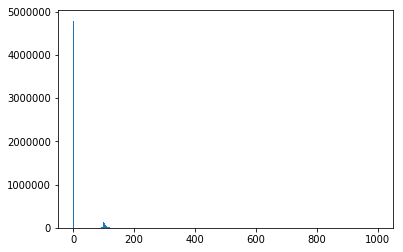

In [6]:
plt.hist(trade['Price'], bins=1000, range=(0, 1e3)) 

# Isin

In [8]:
isin = pd.read_csv('./DSG2018-qualifiers/Isin.csv')
isin

,IsinIdx,TickerIdx,ActualMaturityDateKey,IssueDateKey,Seniority,Currency,ActivityGroup,Region,Activity,RiskCaptain,Owner,CompositeRating,IndustrySector,IndustrySubgroup,MarketIssue,IssuedAmount,CouponType
0,0,238,20381231,20051129,GOV,USD,FLOW LOCAL MARKET,AMERICAS,ARGENTINA,ARGENTINA,EMK ARGENTINA,NR,Government,Sovereign,Domestic,1.246002e+09,STEP CPN
1,1,238,20331231,20051129,GOV,USD,FLOW LOCAL MARKET,AMERICAS,ARGENTINA,ARGENTINA,EMK ARGENTINA,NR,Government,Sovereign,Domestic,4.901086e+09,FIXED
2,2,238,20331231,20051129,GOV,ARS,FLOW LOCAL MARKET,AMERICAS,ARGENTINA,ARGENTINA,EMK ARGENTINA,NR,Government,Sovereign,Domestic,1.501245e+10,FIXED
3,3,236,20170417,20070417,GOV,USD,FLOW LOCAL MARKET,AMERICAS,ARGENTINA,ARGENTINA,EMK ARGENTINA,B,Government,Sovereign,Domestic,7.340076e+09,FIXED
4,4,234,20221004,20100222,GOV,ARS,FLOW LOCAL MARKET,AMERICAS,ARGENTINA,ARGENTINA,EMK ARGENTINA,NR,Government,Sovereign,Domestic,3.058452e+09,FLOATING
5,5,236,20181129,20111129,GOV,USD,FLOW LOCAL MARKET,AMERICAS,ARGENTINA,ARGENTINA,EMK ARGENTINA,NR,Government,Sovereign,Domestic,2.311587e+09,FIXED
6,6,236,20190311,20130311,GOV,ARO,FLOW LOCAL MARKET,AMERICAS,ARGENTINA,ARGENTINA,EMK ARGENTINA,NR,Government,Sovereign,Domestic,3.926268e+10,FLOATING
7,7,236,20240507,20140507,GOV,USD,FLOW LOCAL MARKET,AMERICAS,ARGENTINA,ARGENTINA,EMK ARGENTINA,NR,Government,Sovereign,Domestic,1.962173e+10,FIXED
8,8,236,20170328,20140328,GOV,ARS,FLOW LOCAL MARKET,AMERICAS,ARGENTINA,ARGENTINA,EMK ARGENTINA,NR,Government,Sovereign,Domestic,1.736289e+10,FLOATING
9,9,236,20160929,20140929,GOV,ARS,FLOW LOCAL MARKET,AMERICAS,ARGENTINA,ARGENTINA,EMK ARGENTINA,NR,Government,Sovereign,Domestic,1.000000e+10,FLOATING


# Customer

In [10]:
customer = pd.read_csv('./DSG2018-qualifiers/Customer.csv')
customer

,CustomerIdx,Sector,Subsector,Region,Country
0,2975,Banks and Intermediaries,Bank,Americas,BARBADOS
1,1594,Asset Managers & Hedge Funds,NaN,Americas,BERMUDA
2,399,Corporation,Corp - Comm. & Prof. Services,Americas,BERMUDA
3,836,Asset Owners,Insurance,Americas,BERMUDA
4,816,Asset Owners,Insurance,Americas,BERMUDA
5,567,Banks and Intermediaries,Bank,Americas,BAHAMAS
6,951,Banks and Intermediaries,Private Bank - Wealth Manager,Americas,BAHAMAS
7,783,Banks and Intermediaries,Bank,Americas,BAHAMAS
8,713,Asset Managers & Hedge Funds,Independent Asset Manager,Americas,BAHAMAS
9,1271,Banks and Intermediaries,Bank,Americas,BAHAMAS


# Market

In [127]:
market = pd.read_csv('./DSG2018-qualifiers/Market.csv')
market_train = market[~(market['DateKey'] >= 20180416)]
market_test = market[market['DateKey'] >= 20180416]

# Macro Market

In [128]:
macro = pd.read_csv('./DSG2018-qualifiers/MarketData_Macro.csv')
macro_train = macro[~(macro['DateKey'] >= 20180416)]
macro_test = macro[(macro['DateKey'] >= 20180416)]

# Sample Sub

In [53]:
sample = pd.read_csv('./DSG2018-qualifiers/sample_submission.csv')
sample

,PredictionIdx,CustomerInterest
0,a1e0d80784,0.374540
1,c2cc6cc2a8,0.950714
2,a8e94f6344,0.731994
3,758bae1e35,0.598658
4,02ab378ee8,0.156019
5,1da271574e,0.155995
6,19d88220a5,0.058084
7,d8cd2c8392,0.866176
8,6873ffbe54,0.601115
9,5a90029ee0,0.708073


# Random submission

In [44]:
from scipy.stats import skewnorm
import numpy as np
import random

In [76]:
random.random()

0.8336256153745331

In [113]:
def random_predict(idx):
    if random.random() <= 0.666666:
        return random.uniform(0.1, 0.11)
    else:
        return random.uniform(0.99, 1)

In [114]:
import numpy as np
from sklearn.metrics import roc_auc_score
y_true = trade['CustomerInterest'] 
y_pred = trade['CustomerInterest'].apply(random_predict)
acc = 0
N = 10
for i in range(N):
    acc += roc_auc_score(y_true, y_pred)
print( acc/N)

0.500404338607


In [111]:
sample['CustomerInterest'] = sample['PredictionIdx'].apply(random_predict)

# Mean rush

In [72]:
#train
conversion_rate = pd.DataFrame(columns=['CustomerIdx', 'avgInter', 'avgNotional','avgPrice'])
for customer, subdf in train.groupby('CustomerIdx'):
    avgNot = subdf['NotionalEUR'].mean()
    avgPri = subdf['Price'].mean()
    avgInt = subdf['CustomerInterest'].mean()
    conversion_rate = conversion_rate.append({'CustomerIdx':customer,
                            'avgInter': avgInt,
                            'avgNotional': avgNot,
                            'avgPrice': avgPri}, ignore_index=True)
conversion_rate['CustomerIdx'] = conversion_rate['CustomerIdx'].astype(int)
conversion_rate = conversion_rate.set_index('CustomerIdx')
conversion_rate

,avgInter,avgNotional,avgPrice
CustomerIdx,,,
0,1.000000,3.190500e+06,102.229143
1,1.000000,4.698934e+06,102.539395
2,1.000000,7.526090e+05,86.271429
3,1.000000,1.500000e+07,108.200000
4,1.000000,1.184400e+07,104.142059
5,1.000000,1.151612e+06,97.907758
6,1.000000,1.440974e+06,100.611300
7,1.000000,8.470573e+05,58.500000
8,1.000000,4.410526e+06,71.763782


# Mean submission

In [103]:
#trade
conversion_rate = pd.DataFrame(columns=['CustomerIdx', 'avgInter', 'avgNotional','avgPrice'])
for customer, subdf in trade.groupby('CustomerIdx'):
    avgNot = subdf['NotionalEUR'].mean()
    avgPri = subdf['Price'].mean()
    avgInt = subdf['CustomerInterest'].mean()
    conversion_rate = conversion_rate.append({'CustomerIdx':customer,
                            'avgInter': avgInt,
                            'avgNotional': avgNot,
                            'avgPrice': avgPri}, ignore_index=True)
conversion_rate['CustomerIdx'] = conversion_rate['CustomerIdx'].astype(int)
conversion_rate = conversion_rate.set_index('CustomerIdx')
conversion_rate

,avgInter,avgNotional,avgPrice
CustomerIdx,,,
0,1.000000,3.532124e+06,100.988432
1,1.000000,4.698934e+06,102.539395
2,1.000000,1.205523e+06,94.971000
3,1.000000,1.500000e+07,108.200000
4,1.000000,1.206740e+07,105.072050
5,1.000000,1.129856e+06,99.883252
6,1.000000,1.579784e+06,100.429667
7,1.000000,1.243615e+06,70.937500
8,1.000000,4.451020e+06,78.259584


In [104]:
ans_dict = conversion_rate.to_dict('index')

In [105]:
import random
def predict_mean(customer):
    if customer in ans_dict:
        return ans_dict[customer]['avgInter']
    return -3

In [106]:
challenge['CustomerInterest'] = challenge['CustomerIdx'].apply(predict_mean)

In [109]:
sub = challenge.drop(['DateKey', 'CustomerIdx', 'IsinIdx', 'BuySell', 'customerInterest'],axis=1)
sub

,PredictionIdx,CustomerInterest
0,a1e0d80784,0.575414
1,c2cc6cc2a8,0.575414
2,a8e94f6344,0.331628
3,758bae1e35,0.070975
4,02ab378ee8,0.324699
5,1da271574e,0.408203
6,19d88220a5,0.510031
7,d8cd2c8392,0.266674
8,6873ffbe54,0.068621
9,5a90029ee0,0.510031


In [110]:
sub.to_csv('mean_sub.csv', index=False)

In [102]:
import numpy as np
from sklearn.metrics import roc_auc_score
y_true = test['CustomerInterest']
y_pred = test['CustomerIdx'].apply(predict_mean)
roc_auc_score(y_true, y_pred)

0.89982952862537924

# RF

In [172]:
from sklearn.linear_model import LogisticRegression, Lasso #faio
from sklearn.ensemble import RandomForestClassifier

In [173]:
y_train = trade_train['CustomerInterest']
X_train = trade_train.drop(['TradeDateKey', 'NotionalEUR', 'Price', 'TradeStatus', 'CustomerInterest'],axis=1)
y_test = trade_test['CustomerInterest']
X_test = trade_test.drop(['TradeDateKey', 'NotionalEUR', 'Price', 'TradeStatus', 'CustomerInterest'],axis=1)

In [174]:
X_train['BuySell'], uniques = pd.factorize(X_train['BuySell'])
X_test['BuySell'], uniques = pd.factorize(X_test['BuySell'])

In [175]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [190]:
X_train.columns, rf.feature_importances_

(Index(['CustomerIdx', 'IsinIdx', 'BuySell'], dtype='object'),
 array([ 0.59870678,  0.40064731,  0.00064591]))

In [199]:
roc_auc_score(y_test, [pred[1] for pred in rf.predict_proba(X_test)])

0.89228715867453245

In [204]:
X_full = pd.concat([X_train, X_test])
y_full = pd.concat([y_train, y_test])
rf.fit(X_full, y_full.astype(int))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [205]:
X_challenge = challenge.drop(['PredictionIdx', 'DateKey',
                              'CustomerInterest', 'customerInterest'], axis=1)
X_challenge['BuySell'], comm = pd.factorize(X_challenge['BuySell'])
X_challenge

,CustomerIdx,IsinIdx,BuySell
0,1856,13323,0
1,1856,9230,0
2,1780,9157,0
3,2129,9131,0
4,1758,7151,0
5,1746,13099,0
6,2398,9131,0
7,2789,9131,0
8,2445,4338,0
9,2398,14053,0


In [208]:
sub2 = pd.DataFrame(sub)
sub2['CustomerInterest'] = [pred[1] for pred in rf.predict_proba(X_challenge)]
sub2.to_csv('./sub_rf.csv', index=False)

In [207]:
sub2

,PredictionIdx,CustomerInterest
0,a1e0d80784,1.000000
1,c2cc6cc2a8,0.708333
2,a8e94f6344,1.000000
3,758bae1e35,0.190000
4,02ab378ee8,0.190000
5,1da271574e,0.275130
6,19d88220a5,0.659210
7,d8cd2c8392,0.785714
8,6873ffbe54,0.167895
9,5a90029ee0,0.408333


# XGBoost